In [1]:
function h = daxes(x, y, c)
% daxes -- Draw axes
%
%  Usage
%    daxes(x, y[, c])
%
%  Inputs
%    x, y   origin coordinates
%    c      color
%
%  Outputs
%    h       integer, current figure handle
%
%  Description
%    Draw axes with (x,y) origin.
%
%  See also
%    axis
%

if (nargin == 0)
   x = 0;
   y = 0;
   c = 'b';
elseif (nargin == 2)
   c = 'b';
end;

ax = axis;
hd = ishold;
hold on;
plot([ax(1) ax(2)], [y y], c);
plot([x x], [ax(3) ax(4)], c);
if ~hd, hold off; end;

axis(ax);

h = gcf;

end

% Written on Fri Jan 29 15:21:59 MET 1999
% by Jean-Baptiste Caillau - ENSEEIHT-IRIT (UMR CNRS 5505)

In [2]:
function [ q, b1, s, b3, h ] = bsbfun(z0, th0, zf, thf, e1, e3, ths, varargin)
% bsbfun -- BSB computation and plot.
%
%  Usage
%    [ b1, s, b3, q, h ] = bsbfun(z0, th0, zf, thf, e1, e3, ths, symbol)
%
%  Inputs
%    z0     complex, initial condition
%    th0    real, initial condition
%    zf     complex, terminal condition
%    thf    real, terminal condition
%    e1     integer, +1/-1
%    e3     integer, +1/-1
%    ths    real, singular value of angle
%    symbol character, used for plot
%    N      integer, number of points for plot [ 100 ]
%
%  Outputs
%    q      complex, product of z(tf-b3)-z(b1) with conjugate of exp(i.ths)+w 
%    b1     real, duration on the first bang arc
%    s      real, duration on the singular arc
%    b3     real, duration on the last bang arc
%    h      integer, handle to the current plot
%
%  Description
%    Computes a BSB sequence. The sequence is admissible provided Re q > 0 and Im q = 0.
%    Plot if a symbol is passed.
%

global w

if (nargin == 7)
  draw = 0;
elseif (nargin == 8)
  draw = 1;
  bcol = [ 'k' varargin{1} ];
  scol = [ 'r' varargin{1} ];
  N = 100;
elseif (nargin == 9)
  draw = 1;
  bcol = [ 'k' varargin{1} ];
  scol = [ 'r' varargin{1} ];
  N = varargin{2};
else
  error('Bad number of input arguments.')
end;

th0 = angle(exp(1i*th0)); % normalization to (-pi,pi]
thf = angle(exp(1i*thf));
ths = angle(exp(1i*ths));

b1 = ( ths - th0 ) / e1;
if b1 < 0, b1 = b1+2*pi; end;
if b1 < 0, error('Bad b1.'); end;

b3 = ( thf - ths ) / e3;
if b3 < 0, b3 = b3+2*pi; end;
if b3 < 0, error('Bad b3.'); end;

ih = ishold;

if draw, t = linspace(0, b1, N); else t = b1; end;
th = th0 + e1*t;
z = -1i*e1*( exp(1i*th) - exp(1i*th0) ) + w*t + z0;
if draw
  plot(z, bcol), hold on;
  quiver(real(z0), imag(z0), real(exp(1i*th0)+w), imag(exp(1i*th0)+w));
end;
z1 = z(end);

if draw, t = linspace(-b3, 0, N); else t = -b3; end;
th = thf + e3*t;
z = -1i*e3*( exp(1i*th) - exp(1i*thf) ) + w*t + zf;
if draw
  plot(z, bcol);
  quiver(real(zf), imag(zf), real(exp(1i*thf)+w), imag(exp(1i*thf)+w));
end;
z2 = z(1);

if draw
  plot(linspace(real(z1), real(z2), N), linspace(imag(z1), imag(z2), N), scol);
end;

s = abs(z2-z1) / abs(exp(1i*ths)+w);

q = (z2-z1) * (exp(1i*ths)+w)';

if ~ih, hold off; end

if draw, h = gcf; else h = 0; end;

end

% Written on Mon  5 Nov 2018 18:26:31 CET
% by Jean-Baptiste Caillau - Universite Cote d'Azur, CNRS, Inria, LJAD

ans =  0.72986
tths =  0.78540
                                                                               
  10 |---------------------------------------------------------------------|   
     |        +        +       +        =        +        +       +        |   
     |                                  =                                  |   
     |                        *******   =   #######                        |   
     |                      **       ***=###       ##                      |   
   5 |-+                  **           #=#           ##                  +-|   
     |                  **            ##=**            ##                  |   
     |                 **           ### = ***           ##                 |   
     |               ***           ##   =   **           ###               |   
     |              **            ##    =    **            ##              |   
   0 |&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&=&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&|   
     |   

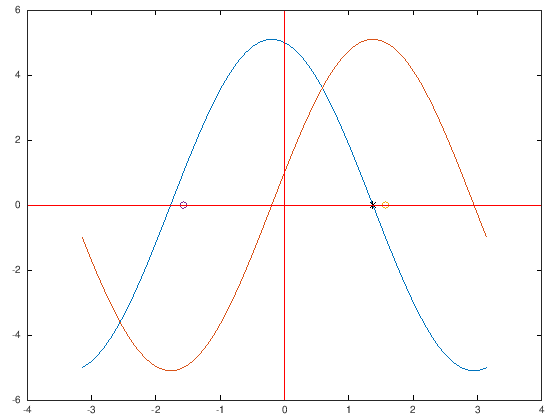

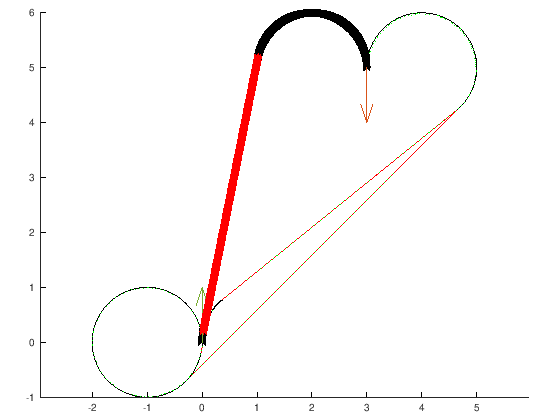

In [3]:
% main.m
%

%clear all, close all, format long

global w

% Initializations

%w = .6; z0 = 0; th0 = 1; zf = 3+2i; thf = -2; % 1
%w = .6; z0 = 0; th0 = acos(-w); zf = 1+2i; thf = -th0;
%w = .6; z0 = 0; th0 = acos(-w); zf = 4+4i; thf = -th0;
%w = .4; z0 = 0; th0 = acos(-w); zf = 4+4i; thf = -th0; % 2
%w = .2; z0 = 0; th0 = acos(-w); zf = 4+4i; thf = -th0; % 2.5
%w = .0; z0 = 0; th0 = acos(-w); zf = 4+4i; thf = -th0; % 3
%w = .8; z0 = 0; th0 = acos(-w); zf = 4+4i; thf = -th0; 4
%w = .4; z0 = 0; th0 = acos(-w); zf = 4+4i; thf = th0; % 5
%w = .4; z0 = 0; th0 = acos(-w); zf = 6+4i; thf = th0;
%w = .0; z0 = 0; th0 = acos(-w); zf = 6+4i; thf = th0;
%w = .01; z0 = 0; th0 = acos(-w); zf = 0+4i; thf = th0;
%w = .95; z0 = 0; th0 = acos(-w); zf = 4+4i; thf = -th0;
w = 0; z0 = 0; th0 = pi/2; zf = 3+5i; thf = -th0; % (1) 
%w = 0.2; z0 = 0; th0 = acos(-w); zf = 3+5i; thf = -th0; % (2) *
%w = 0.4; z0 = 0; th0 = acos(-w); zf = 3+5i; thf = -th0; % (2) *
%w = 0.4; z0 = 0; th0 = pi/2; zf = 3+5i; thf = -th0; % (3) 
%w = 0.4; z0 = 0; th0 = pi/4; zf = 3+5i; thf = 290/180*pi; % (5) *
%w =-.5; z0 = 0; th0 = pi/4; zf=-4+5i; thf =-pi/2;
%w = .6; z0 = 0; th0 = pi/7; zf= 9+0.7i; thf = pi/3;

th0 = angle(exp(1i*th0)); % normalization to (-pi,pi]
thf = angle(exp(1i*thf));

N = 100; ths = linspace(-pi, pi, N);
draw = 0; key = 0;

if draw, fig1 = figure; set(fig1, 'Position', [749 385 560 420]), zoom on; end;
fig2 = figure; set(fig2, 'Position', [159 385 560 420]), zoom on;
fig3 = figure; set(fig3, 'Position', [871 9 560 420]), axis equal, hold on, zoom on;

% Solving

ee = [ +1 -1 +1 -1 % (e1, e3) sequences
       +1 +1 -1 -1 ]; 
EE = [ ];
THS = [ ]; 
TF = [ ]; 

for k = 1:size(ee, 2)

e1 = ee(1, k);
e3 = ee(2, k);

q = zeros(1, N);

if draw, figure(fig1); end;

for i = 1:N
  if draw
    q(i) = bsbfun(z0, th0, zf, thf, e1, e3, ths(i), '-');
    drawnow, if key, input(' '); end;
  else
    q(i) = bsbfun(z0, th0, zf, thf, e1, e3, ths(i));
  end;
end;

dth = ths(2)-ths(1);
th1 = min([ th0 thf ]);
th2 = max([ th0 thf ]);

qq = imag(q(1:end-1)).*imag(q(2:end)) < 0;

i1 = find( qq & (ths(1:end-1) < th1-dth) ); 
j1 = find( real(q(i1)) > 0 );
i1 = i1(j1);

i2 = find( qq & (ths(1:end-1) > th1+dth) & (ths(1:end-1) < th2-dth) ); 
j2 = find( real(q(i2)) > 0 );
i2 = i2(j2);

i3 = find( qq & (ths(1:end-1) > th2+dth) ); 
j3 = find( real(q(i3)) > 0 );
i3 = i3(j3);

is = [ i1 i2 i3 ];
Ns = size(is, 2);

ths(is)

optfz = optimset('fzero');
optfz = optimset(optfz, 'TolX', 1e-9, 'Display', 'iter');
foo = @(ths) imag( bsbfun(z0, th0, zf, thf, e1, e3, ths) );

tths = [ ];

for j = 1:Ns
  [ sol, err, flag ] = fzero(foo, ths(is(j)), optfz);
  if (flag == 1), tths = [ tths sol ]; end;
end;

Ns = size(tths, 2);
tths

figure(fig2);
plot(ths, imag(q), ths, real(q)), hold on;
plot(th0, 0, 'o'), plot(thf, 0, 'o');
plot(tths, zeros(1, Ns), 'k*');
daxes(0, 0, 'r');
hold off;

% Plots

figure(fig3);
tf = zeros(1, Ns);
optode = odeset('AbsTol', 1e-9, 'RelTol', 1e-7);
x0 = [ real(z0) imag(z0) th0 ]';

for j = 1:Ns
  if key, input(' '); end;
  [ q, b1, s, b3 ] = bsbfun(z0, th0, zf, thf, e1, e3, tths(j), '-', 1000);
  drawnow;
  tf(j) = b1 + s + b3; tf(j)
  ufun = @(t) e1 * (t < b1) + e3 * (t > b1 + s);
  ffun = @(t, x) [ cos(x(3)) + w
                   sin(x(3))
                   ufun(t) ];
  [ dummy, x ] = ode45(ffun, [ 0 tf(j) ], x0, optode); x = x';
  plot(x(1, :), x(2, :), 'g:');

end;

EE = [ EE ee(:, k) * ones(1, Ns) ];
THS = [ THS tths ];
TF = [ TF tf ];

end;

[ TF, i ] = sort(TF);
EE = EE(:, i);
THS = THS(i);
if ~isempty(TF)
  bsbfun(z0, th0, zf, thf, EE(1, 1), EE(2, 1), THS(1), '*', 1000);
end;

TF, EE